In [3]:
!pip install transformers datasets evaluate streamlit pyngrok -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.2 MB/s eta 0:00:00


In [4]:
from transformers import pipeline
from datasets import load_dataset
from evaluate import load
import torch


In [5]:
dataset = load_dataset("squad")
subset = dataset["validation"].select(range(50))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

plain_text/validation-00000-of-00001.par(…):   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [6]:
models = {
    "DistilBERT": "distilbert-base-cased-distilled-squad",
    "BERT": "bert-large-uncased-whole-word-masking-finetuned-squad",
    "RoBERTa": "deepset/roberta-base-squad2",
    "ALBERT": "twmkn9/albert-base-v2-squad2"
}


In [7]:
metric = load("squad")

results_all = {}

for model_name, model_ckpt in models.items():
    print(f"Evaluating {model_name}...")
    qa_pipeline = pipeline("question-answering", model=model_ckpt)
    predictions, references = [], []

    for qa in subset:
        pred = qa_pipeline(question=qa['question'], context=qa['context'])
        predictions.append({"id": qa["id"], "prediction_text": pred['answer']})
        references.append({"id": qa["id"], "answers": qa["answers"]})

    results = metric.compute(predictions=predictions, references=references)
    results_all[model_name] = results

print("Final Results:")
print(results_all)


Evaluating DistilBERT...


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Fetching 0 files: 0it [00:00, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 0 files: 0it [00:00, ?it/s]

Device set to use cpu


Evaluating BERT...


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Fetching 0 files: 0it [00:00, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 0 files: 0it [00:00, ?it/s]

Device set to use cpu


Evaluating RoBERTa...


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Fetching 0 files: 0it [00:00, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 0 files: 0it [00:00, ?it/s]

Device set to use cpu


Evaluating ALBERT...


config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

Some weights of the model checkpoint at twmkn9/albert-base-v2-squad2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

Fetching 0 files: 0it [00:00, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 0 files: 0it [00:00, ?it/s]

Device set to use cpu


Final Results:
{'DistilBERT': {'exact_match': 82.0, 'f1': 86.80000000000001}, 'BERT': {'exact_match': 88.0, 'f1': 94.99047619047619}, 'RoBERTa': {'exact_match': 96.0, 'f1': 98.45714285714286}, 'ALBERT': {'exact_match': 82.0, 'f1': 84.04444444444445}}


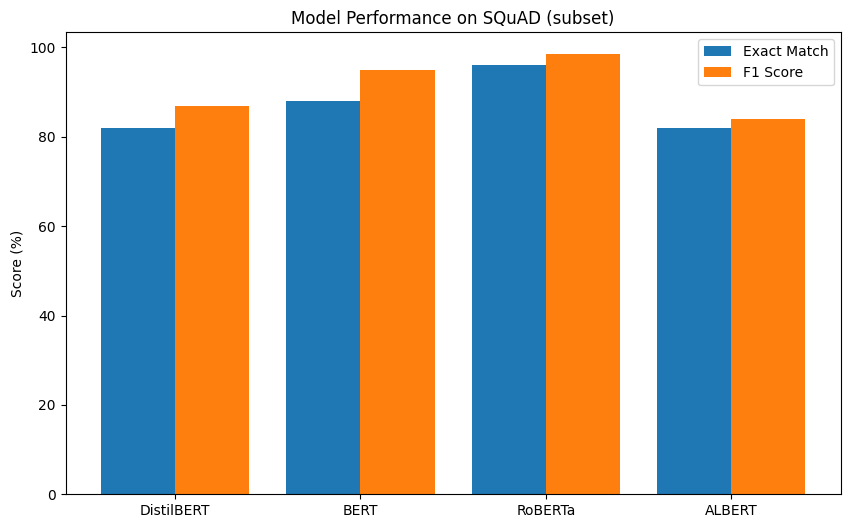

In [8]:
import matplotlib.pyplot as plt

model_names = list(results_all.keys())
exact_matches = [results_all[m]["exact_match"] for m in model_names]
f1_scores = [results_all[m]["f1"] for m in model_names]

x = range(len(model_names))

plt.figure(figsize=(10,6))
plt.bar(x, exact_matches, width=0.4, label="Exact Match", align="center")
plt.bar([i+0.4 for i in x], f1_scores, width=0.4, label="F1 Score", align="center")

plt.xticks([i+0.2 for i in x], model_names)
plt.ylabel("Score (%)")
plt.title("Model Performance on SQuAD (subset)")
plt.legend()
plt.show()


In [9]:
%%writefile qa_app.py
import streamlit as st
from transformers import pipeline

st.title("Question Answering System")

model_choice = st.selectbox("Choose a model:", ["DistilBERT", "BERT", "RoBERTa", "ALBERT"])
model_paths = {
    "DistilBERT": "distilbert-base-uncased-distilled-squad",
    "BERT": "bert-large-uncased-whole-word-masking-finetuned-squad",
    "RoBERTa": "deepset/roberta-base-squad2",
    "ALBERT": "twmkn9/albert-base-v2-squad2"
}

qa_pipeline = pipeline("question-answering", model=model_paths[model_choice])

context = st.text_area("Enter Context (passage):")
question = st.text_input("Enter Question:")

if st.button("Get Answer"):
    if context and question:
        result = qa_pipeline(question=question, context=context)
        st.success(f"Answer: {result['answer']}")
    else:
        st.warning("Please enter both context and question!")


Writing qa_app.py


In [10]:
import subprocess, time
from pyngrok import ngrok

ngrok.set_auth_token("32jK1Zq45Cit7V4GhULGd3fn6zb_3kcwCqu8Qpu8gYFkwVfD")

public_url = ngrok.connect(8501)
print("Open your QA app here:", public_url)

process = subprocess.Popen(["streamlit", "run", "qa_app.py"])

for _ in range(60):
    time.sleep(1)



Open your QA app here: NgrokTunnel: "https://2ab5486d892e.ngrok-free.app" -> "http://localhost:8501"
